In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

[WikiArt](https://www.kaggle.com/datasets/steubk/wikiart)

In [4]:
image = cv2.imread("aldo-mondino_settembre.jpg")
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape, image2.shape

((1382, 1833, 3), (1382, 1833, 3))

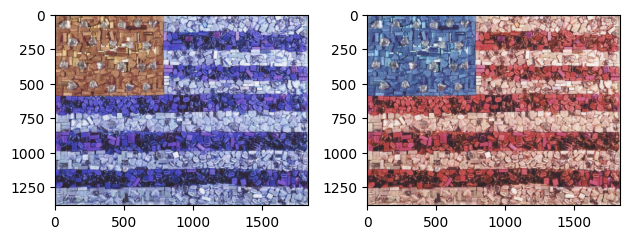

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(image)
ax2.imshow(image2)

plt.tight_layout()
plt.show()

In [7]:
image.max(axis=0).max(axis=0)

array([255, 255, 255], dtype=uint8)

In [8]:
def preprocess_image(image):
    processed_image = image.reshape(-1, 3)/255
    return processed_image

In [9]:
processed_image = preprocess_image(image)
processed_image.max(axis=0).max(axis=0)

np.float64(1.0)

In [ ]:
# def silhouette_score_(X, k_min=2, k_max=10):
#     silhouette = {}
#     for k in range(k_min, k_max+1):
#         print(k)
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(X)
#         silhouette[k] = silhouette_score(X, kmeans.labels_)

#     plt.figure()
#     plt.plot(silhouette.keys(), silhouette.values())
#     plt.ylabel("silhouette")
#     plt.xlabel("Number of clústers")
#     plt.show()

#     return silhouette

In [ ]:
# silhouette = silhouette_score_(processed_image, k_min=3, k_max=6)
# np.argmax(silhouette)

In [10]:
def elbow_method(X, k_min=1, k_max=10):
    inertia = {}
    for k in range(k_min, k_max+1):
        print(k)
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia[k] = kmeans.inertia_

    plt.figure()
    plt.plot(inertia.keys(), inertia.values())
    plt.ylabel("Inertia")
    plt.xlabel("Number of clústers")
    plt.show()

    return inertia

1
2
3
4
5
6
7
8
9
10


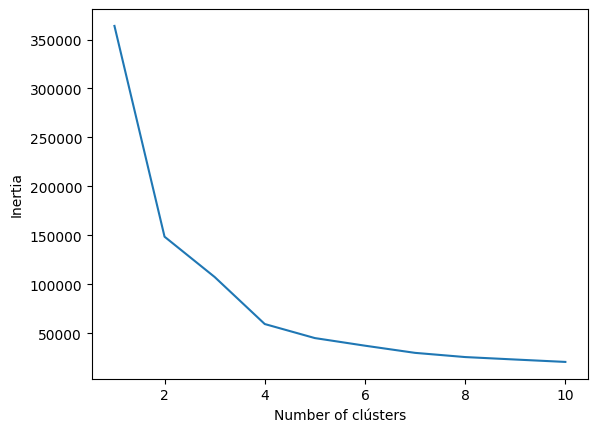

In [17]:
inertia = elbow_method(processed_image, k_min=1, k_max=10)

In [11]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
predicted_image = kmeans4.fit_predict(processed_image)
predicted_image.shape

(2533206,)

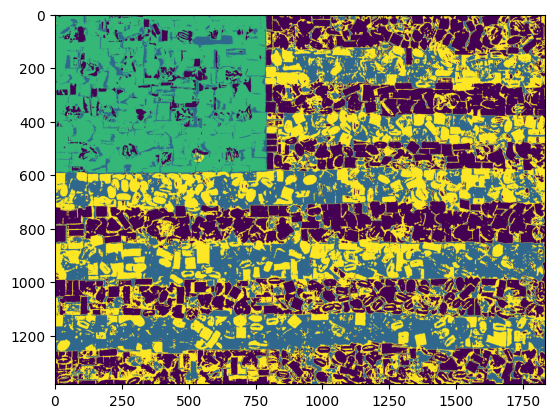

In [12]:
reshaped_predicted_image = predicted_image.reshape((image.shape[0], image.shape[1]))

plt.figure()
plt.imshow(reshaped_predicted_image)
plt.show()

In [13]:
# centroids = [(a, b, c) for a, b, c in kmeans4.cluster_centers_]
centroids = kmeans4.cluster_centers_
centroids

array([[0.70940479, 0.74023643, 0.86203468],
       [0.22361655, 0.20950258, 0.38576949],
       [0.62637863, 0.44957417, 0.36499311],
       [0.40272548, 0.40469736, 0.70194327]])

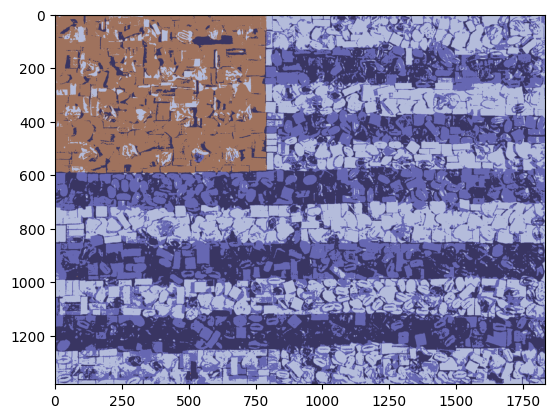

In [14]:
clustered_image = centroids[reshaped_predicted_image]

plt.figure()
plt.imshow(clustered_image)
plt.show()

In [15]:
import matplotlib.patches as patches

In [16]:
num_clusters = len(centroids)

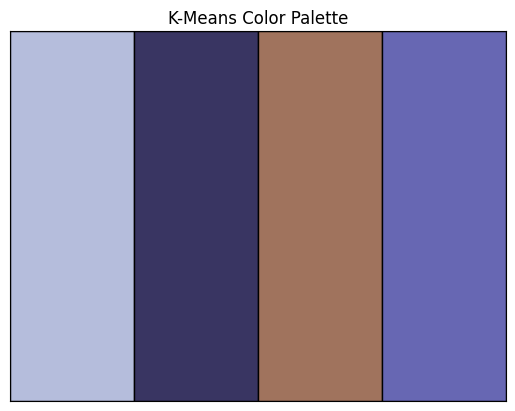

In [17]:

fig, ax = plt.subplots()

# Set the limits of the plot (important for seeing the color patches)
ax.set_xlim(0, num_clusters)  # Adjust as needed for spacing
ax.set_ylim(0, 1)  # We'll keep the y-axis between 0 and 1

# Hide the axes ticks and labels (optional, for a cleaner palette view)
ax.set_xticks([])
ax.set_yticks([])

for i, color in enumerate(centroids):
    rect = patches.Rectangle((i, 0), 1, 1, linewidth=1, edgecolor='black', facecolor=color)  # i: x position, 0: y position, 1: width, 1: height, edgecolor: border color, facecolor: fill color
    # Add the patch to the axes
    ax.add_patch(rect)

plt.title("K-Means Color Palette")
plt.show()

1
2
3
4
5
6
7
8
9
10


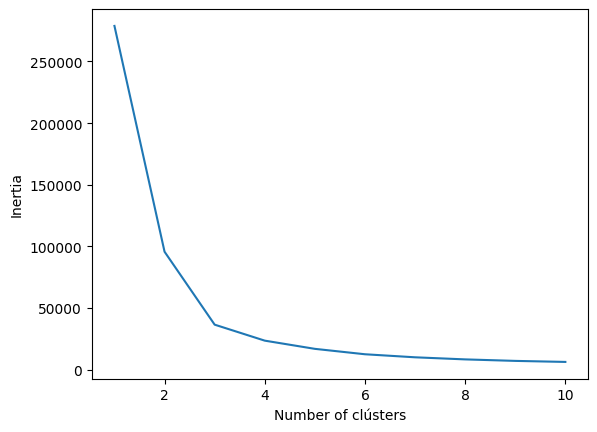

In [19]:
image2 = cv2.imread("adolf-hitler_sitting-room.jpg")
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
processed_image2 = preprocess_image(image2)

inertia2 = elbow_method(processed_image2, k_min=1, k_max=10)

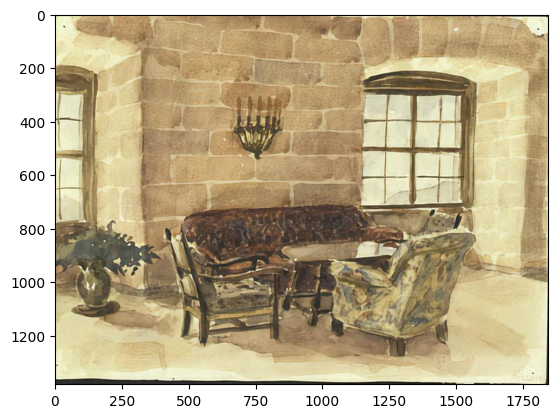

In [20]:
plt.figure()
plt.imshow(image2)
plt.show()

In [21]:
kmeans3 = KMeans(n_clusters=3, random_state=42)
predicted_image2 = kmeans3.fit_predict(processed_image2)
predicted_image2.shape

(2549790,)

In [22]:
reshaped_predicted_image2 = predicted_image2.reshape((image2.shape[0], image2.shape[1]))


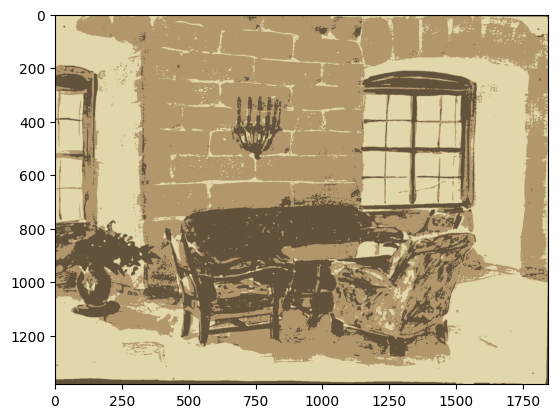

In [23]:
centroids2 = kmeans3.cluster_centers_

clustered_image2 = centroids2[reshaped_predicted_image2]

plt.figure()
plt.imshow(clustered_image2)
plt.show()

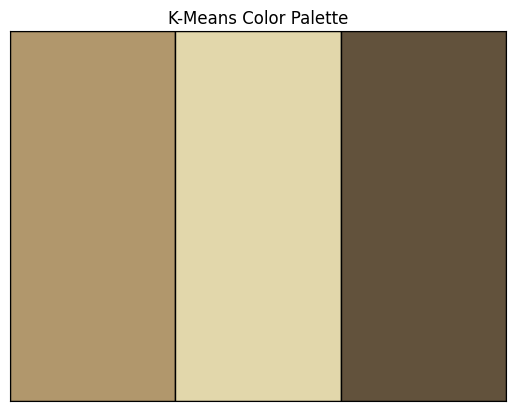

In [24]:
num_clusters2 = len(centroids2)

fig, ax = plt.subplots()

# Set the limits of the plot (important for seeing the color patches)
ax.set_xlim(0, num_clusters2)  # Adjust as needed for spacing
ax.set_ylim(0, 1)  # We'll keep the y-axis between 0 and 1

# Hide the axes ticks and labels (optional, for a cleaner palette view)
ax.set_xticks([])
ax.set_yticks([])

for i, color in enumerate(centroids2):
    rect = patches.Rectangle((i, 0), 1, 1, linewidth=1, edgecolor='black', facecolor=color)  # i: x position, 0: y position, 1: width, 1: height, edgecolor: border color, facecolor: fill color
    # Add the patch to the axes
    ax.add_patch(rect)

plt.title("K-Means Color Palette")
plt.show()